In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("bank_1.csv")
data.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11152,34,housemaid,married,secondary,no,390,yes,no,cellular,15,jul,659,3,-1,0,unknown,no
11153,43,admin.,single,secondary,no,35,no,no,telephone,9,nov,208,1,-1,0,unknown,no
11154,52,technician,married,tertiary,no,523,yes,yes,cellular,8,jul,113,1,-1,0,unknown,no
11155,35,blue-collar,married,secondary,no,80,yes,yes,cellular,21,nov,38,2,172,2,failure,no
11156,34,blue-collar,single,secondary,no,-72,yes,no,cellular,7,jul,273,5,-1,0,unknown,no
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [4]:
data.shape

(11162, 17)

In [5]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [6]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [7]:
selected_col=['default', 'housing','loan','deposit']
selected_col

['default', 'housing', 'loan', 'deposit']

In [8]:
for col in selected_col:
    data[col]=data[col].map({"yes":1,"no":0})

In [9]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,1


In [10]:
dummy_data=pd.get_dummies(["job","marital","eduucation","contact","month","poutcome"],drop_first=True)
dummy_data

,eduucation,job,marital,month,poutcome
0,False,True,False,False,False
1,False,False,True,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,True,False
5,False,False,False,False,True


In [11]:
data=pd.get_dummies(data,columns=["job","marital","education","contact","month","poutcome"],drop_first=True,dtype="int64")
data

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,59,0,2343,1,0,5,1042,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
1,56,0,45,0,0,5,1467,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
2,41,0,1270,1,0,5,1389,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
3,55,0,2476,1,0,5,579,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
4,54,0,184,0,0,5,673,2,-1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,0,1,1,0,20,257,1,-1,0,...,0,0,0,0,0,0,0,0,0,1
11158,39,0,733,0,0,16,83,4,-1,0,...,0,1,0,0,0,0,0,0,0,1
11159,32,0,29,0,0,19,156,2,-1,0,...,0,0,0,0,0,0,0,0,0,1
11160,43,0,0,0,1,8,9,2,172,5,...,0,0,0,1,0,0,0,0,0,0


In [12]:
x=data.drop(["deposit"],axis=1)
x

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,59,0,2343,1,0,5,1042,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
1,56,0,45,0,0,5,1467,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
2,41,0,1270,1,0,5,1389,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
3,55,0,2476,1,0,5,579,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
4,54,0,184,0,0,5,673,2,-1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,0,1,1,0,20,257,1,-1,0,...,0,0,0,0,0,0,0,0,0,1
11158,39,0,733,0,0,16,83,4,-1,0,...,0,1,0,0,0,0,0,0,0,1
11159,32,0,29,0,0,19,156,2,-1,0,...,0,0,0,0,0,0,0,0,0,1
11160,43,0,0,0,1,8,9,2,172,5,...,0,0,0,1,0,0,0,0,0,0


In [13]:
y=data["deposit"]
y

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12345,shuffle=True)
print(f"x_train {x_train.shape}")
print(f"x_test {y_test.shape}")
print(f"y_train {x_train.shape}")
print(f"y_test {y_test.shape}")

x_train (8929, 42)
x_test (2233,)
y_train (8929, 42)
y_test (2233,)


In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
bank_rf=RandomForestClassifier()
bank_rf

RandomForestClassifier()

In [18]:
bank_rf.fit(x_train,y_train)
y_predict=bank_rf.predict(x_test)

In [19]:
y_predict

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [20]:
from sklearn.metrics import classification_report

In [21]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85      1183
           1       0.80      0.88      0.84      1050

    accuracy                           0.84      2233
   macro avg       0.84      0.85      0.84      2233
weighted avg       0.85      0.84      0.84      2233



In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [23]:
select_model=[LogisticRegression(),
             DecisionTreeClassifier(max_depth=None,min_samples_leaf=1,min_samples_split=10),
             RandomForestClassifier(max_depth=None,min_samples_leaf=1,min_samples_split=10,n_estimators=350)]

In [24]:
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [25]:
acc=[]
for model in select_model:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f"accuracy{accuracy_score(y_pred,y_test)} of model is {model}")
    acc.append(accuracy_score(y_predict,y_test))
    print(acc)

accuracy0.7814599193909538 of model is LogisticRegression()
[0.8432601880877743]
accuracy0.7841468875951635 of model is DecisionTreeClassifier(min_samples_split=10)
[0.8432601880877743, 0.8432601880877743]
accuracy0.8428123600537394 of model is RandomForestClassifier(min_samples_split=10, n_estimators=350)
[0.8432601880877743, 0.8432601880877743, 0.8432601880877743]


In [26]:
result=[acc]
result

[[0.8432601880877743, 0.8432601880877743, 0.8432601880877743]]

In [27]:
pd.DataFrame(data=result,columns=(["Logistic regression","decision tree ","random forcement"]), index=["accuracy"])

,Logistic regression,decision tree,random forcement
accuracy,0.84326,0.84326,0.84326


In [28]:
rf=RandomForestClassifier()
rf

RandomForestClassifier()

In [29]:
param_grid= {
    'n_estimators': [100,200,300,350], # number of tree in the forest 
    'max_depth': [None, 10,20,30], #Maximum depth of he tree
    'min_samples_split': [2,5,10], # Minimum number of sample required to split an internal node
    'min_samples_leaf': [1,2,4], #Minimum number of samples required to be at a leaf node
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rf,param_grid=param_grid,n_jobs=-1)
#njobs-1 for faster computation / parallization?

#fit the model with differen hyer parameters combinations
grid_search.fit(x_train,y_train)

#Get the best hyperparameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [ ]:
best_params

# #RANDOM HYPER PARAMETERS
#DecisionTreeRegressor(max_depth=4,min_samples_split=30,min_samples_leaf=3) 
#RandomForestRegressor(n_estimators=20,max_depth=4,min_samples_split=30,min_samples_leaf=3)

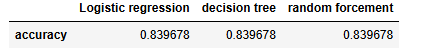

In [ ]:
#Grid Search Hyper Parameters
#DecisionTreeClassifier(max_depth=None,min_samples_leaf=1,min_samples_split=10),
#             RandomForestClassifier(max_depth=None,min_samples_leaf=1,min_samples_split=10,n_estimators=350)
